In [2]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
Data_set = pd.read_csv('./DATA.csv',engine='python')

In [6]:
Data_set

,Time (in seconds),Vehicle’s speed (in m/s),Engine Load (% of max power),Total Acceleration (m/s^2),Engine RPM,Pitch,Lateral Acceleration (m/s^2)
0,0.020000,0.000000,0.000000,0.000000,0.000000,-0.323710,0.000000
1,0.027000,0.000000,0.000000,0.000000,0.000000,-0.333910,0.000000
2,0.037000,0.000000,0.000000,0.000000,0.000000,-0.344200,0.000000
3,0.047000,0.000000,0.000000,0.000000,0.000000,-0.354570,0.000000
4,0.057000,0.000000,0.000000,0.000000,0.000000,-0.365020,0.000000
...,...,...,...,...,...,...,...
244338,2443.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
244339,2443.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
244340,2443.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
244341,1221.824441,4.208266,6.506821,0.084486,1346.820666,0.493134,-0.001158


In [15]:
X = Data_set.iloc[:50,0:1].values
X

array([[0.02 ],
       [0.027],
       [0.037],
       [0.047],
       [0.057],
       [0.067],
       [0.077],
       [0.087],
       [0.097],
       [0.107],
       [0.117],
       [0.127],
       [0.137],
       [0.147],
       [0.157],
       [0.167],
       [0.177],
       [0.186],
       [0.197],
       [0.207],
       [0.217],
       [0.227],
       [0.237],
       [0.247],
       [0.257],
       [0.267],
       [0.277],
       [0.287],
       [0.297],
       [0.307],
       [0.316],
       [0.327],
       [0.337],
       [0.347],
       [0.357],
       [0.367],
       [0.381],
       [0.386],
       [0.398],
       [0.407],
       [0.417],
       [0.432],
       [0.436],
       [0.449],
       [0.457],
       [0.467],
       [0.477],
       [0.488],
       [0.497],
       [0.508]])

In [16]:
y = Data_set.iloc[:50,-1].values
y

array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.7400e-05,
        3.5100e-05,  5.2000e-05,  6.7700e-05,  8.1900e-05,  9.9800e-05,
        1.1649e-04,  1.3464e-04,  1.4911e-04,  3.3000e-05,  3.6200e-05,
        3.9800e-05,  4.3000e-05,  4.6500e-05, -4.9400e-05, -5.2700e-05,
        5.6000e-05,  5.9600e-05,  6.2900e-05,  6.6000e-05,  6.9000e-05,
        7.2200e-05,  2.2646e-04,  2.3691e-04,  8.2200e-05,  8.5100e-05,
       -8.8500e-05, -9.1700e-05, -9.5100e-05, -9.8300e-05,  1.0173e-04,
        1.0502e-04, -1.0801e-04, -1.1139e-04,  1.1453e-04,  1.1797e-04])

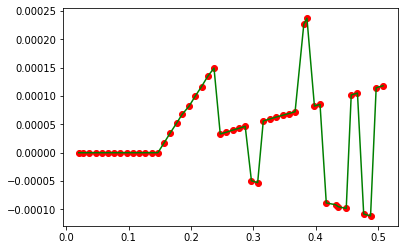

In [19]:
plt.scatter(X,y,color='red')
plt.plot(X,y,color='green')

Here we are taking 50 DATA and we plotted it , training Polynomial Regression to predict the lateral acceleration

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
y_predict = reg.predict(X_test)

In [35]:
print(y_test,y_predict)

[-5.27e-05 -9.83e-05  6.90e-05  0.00e+00  0.00e+00  7.22e-05  0.00e+00
  3.62e-05  0.00e+00  0.00e+00] [4.38582201e-05 5.10238436e-05 4.63813269e-05 3.57842780e-05
 2.97288215e-05 4.68859483e-05 3.12426857e-05 4.13351132e-05
 3.17473070e-05 3.52796567e-05]


Text(0, 0.5, 'Lateral Accelerarion in m')

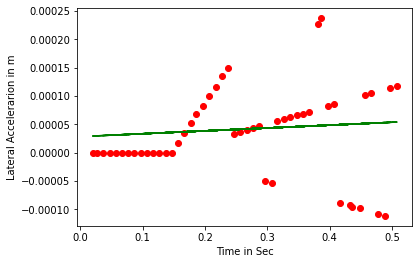

In [44]:
plt.scatter(X,y,color='red')
plt.plot(X_train,reg.predict(X_train),color='green')
plt.xlabel('Time in Sec') 
plt.ylabel('Lateral Accelerarion in m')

In [54]:
import math as M
def Acc(y,y_p):
    error=0
    for i in range(len(y)):
        error=sum(y[i]-y_p[i])**2//len(y)
    return M.sqrt(error)

In [55]:
Acc(y_test,y_predict)

TypeError: 'numpy.float64' object is not iterable

In [58]:
from sklearn import metrics

In [62]:
print("Error : ",nm.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Error :  6.180035887244287e-05


In [63]:
print("Intercept : ",reg.intercept_)

Intercept :  2.8366343821695255e-05


In [67]:
print("Coefficent : ",reg.coef_)

Coefficent :  [5.04621376e-05]


In [69]:
reg.predict([[1.997]])

array([0.00012914])

Polynomial Regression


In [80]:
from sklearn.preprocessing import PolynomialFeatures
x_poly = PolynomialFeatures(degree=3)
X_p = x_poly.fit_transform(X_train)
reg_poly = LinearRegression()
reg_poly.fit(X_p,y_train)

LinearRegression()

Text(0, 0.5, 'Lateral Accelerarion in m')

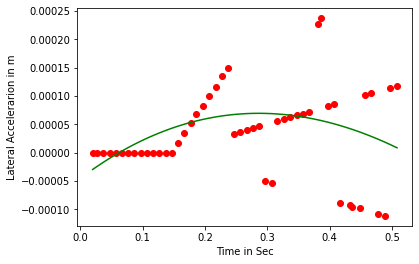

In [82]:
plt.scatter(X,y,color='red')
plt.plot(X,reg_poly.predict(x_poly.fit_transform(X)),color='green')
plt.xlabel('Time in Sec') 
plt.ylabel('Lateral Accelerarion in m')

In [90]:
reg_poly.predict(x_poly.fit_transform([[1.997]]))

array([-0.00212316])

In [91]:
reg.predict([[1.997]])

array([0.00012914])